# Finding Heavy Traffic Indicators on I-94

In this project we will be working with a data set containing data about westbound traffic on US Interstate Highway I-94. Our goal will be to analyze the data to determine which factors are indicators of heavy traffic on the highway. 

The data set was made available by John Hogue and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). The documentation for the data set explains that the data was collected at a station midway between Minneapolis and St. Paul MN, and data was only collected for westbound traffic. 

## Inital Data Exploration 

We will begin by reading in and examining our data set using Pandas:

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Our data set has 48204 rows, each representing an hour of the day. The timeframe of the data set ranges from 2012-10-02 09:00:00 to 2018-09-30 23:00:00, a period of roughly six years. We can also see that our data set contains no null values.

## Analyzing Traffic Volume

Now that we have taken a quick look at the structure of our data set, we will take a closer look at the `traffic_volume` column. This column will be important to our analysis since we are concered with factors that my contribute to increasing traffic volume. To start, we will plot a histogram of this column using Matplotlib:

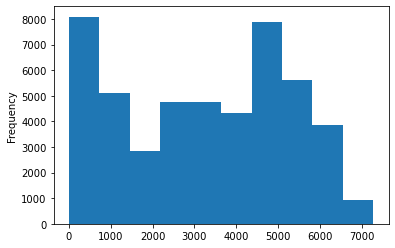

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.show()

traffic['traffic_volume'].describe()

The amount of cars per hour in our data set ranges from 0 to 7280. Our histogram shows us that there are a large number of values in the 0-1000 cars range and the stats tell us that about 25% of the time there are 1193 cars passing the station per hour on I-94. This likely corresponds to hours in the middle of the night when most people are sleeping or during hours when construction is taking place, limiting the amount of cars that can pass through at a time. The histogram also shows a large amout of values in the 4500-5000 range, and we can see that 25% of the time there are 4933 cars passing the station. This likley corresponds to rush hour traffic in the morning and evening hours. 

## Traffic Volume: Day vs. Night

Building off the insights gained from our histogram above, we will now dig deeper into the difference in traffic volume during the day vs during the night. To do this, we will start by dividing our data set into day hours (7AM to 7PM) and night hours (7PM to 7AM):

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)
night = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


There are some missing rows for the night time data, which can be attributed to rows in the data set that are missing entries. To better help us visualize the differences in traffic between day and night, we will plot histograms of both data sets:

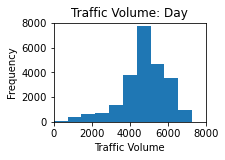

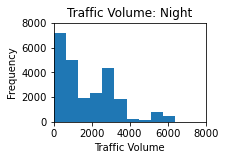

In [10]:
plt.figure()

plt.subplot(2, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()

plt.subplot(2, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()